# Health Insurance Cost Predictor

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [80]:
import warnings
warnings.filterwarnings('ignore')

## Data Collection

### Real-world data acquired from Kaggle's "Medical Cost Personal Datasets".
#### https://www.kaggle.com/code/mragpavank/medical-cost-personal-datasets

In [81]:
health_insurance=pd.read_csv('insurance.csv')

## Data Exploration

In [82]:
health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Checking for missing values

In [83]:
health_insurance.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
health_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

####  Statistical overview

In [85]:
health_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Noticed a high range in the bmi column (15-53) so I'll be checking for outliers

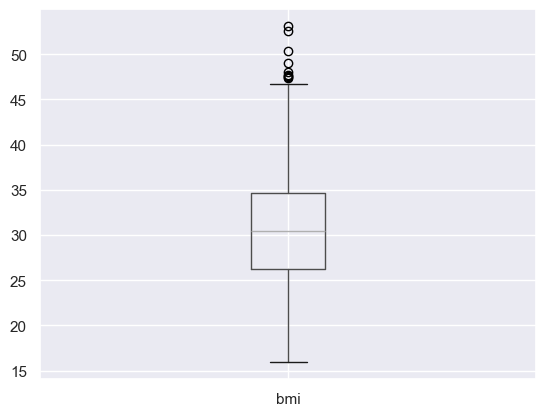

In [86]:
health_insurance.boxplot('bmi')
plt.show()

In [87]:
Q1 = health_insurance['bmi'].quantile(0.25)
Q3 = health_insurance['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = health_insurance[(health_insurance['bmi'] < lower_bound) | (health_insurance['bmi'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("outlier rows:")
print(outliers)

Number of outliers: 9
outlier rows:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


 #### High range in the charges column (1121-63770) so I'll be checking for outliers

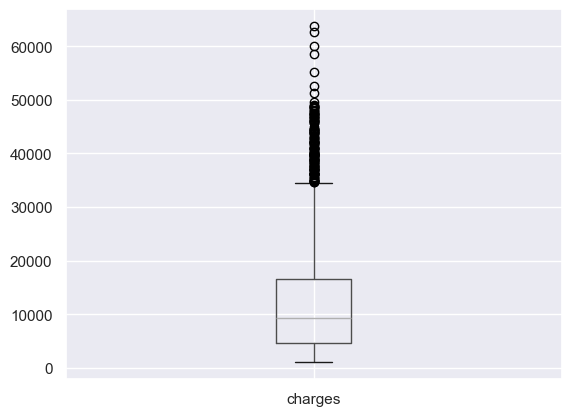

In [88]:
health_insurance.boxplot('charges')
plt.show()

In [89]:
Q1 = health_insurance['charges'].quantile(0.25)
Q3 = health_insurance['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = health_insurance[(health_insurance['charges'] < lower_bound) | (health_insurance['charges'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("outlier rows:")
print(outliers)

Number of outliers: 139
outlier rows:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


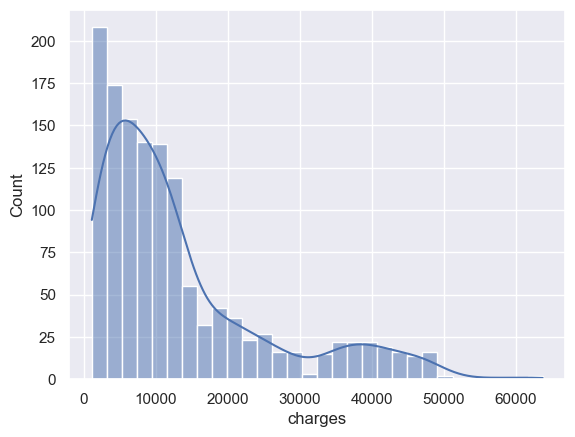

In [90]:
sns.histplot(health_insurance['charges'], kde=True)
plt.show()

#### Right skewed indicating the outliers are high values

# Feature Engineering

In [91]:
health_insurance['bmi_category'] = pd.cut(health_insurance['bmi'], bins=[0, 18.5, 25, 30, 55], 
                            labels=['underweight', 'normal', 'overweight', 'obese'])

In [92]:
health_insurance['age_group'] = pd.cut(health_insurance['age'], bins=[0, 30, 50, 100], 
                        labels=['young', 'middle-aged', 'senior'])

# Data Insights

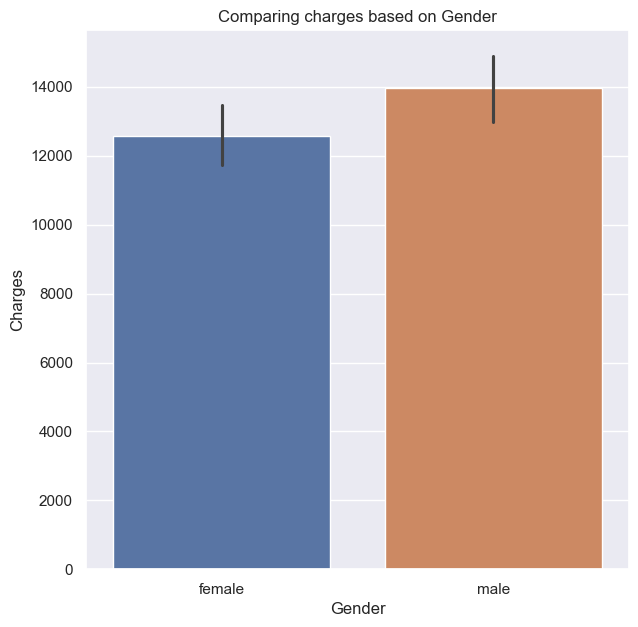

In [93]:
plt.figure(figsize=(7, 7))
sns.barplot(x='sex', y='charges', hue='sex', data=health_insurance)
plt.title('Comparing charges based on Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

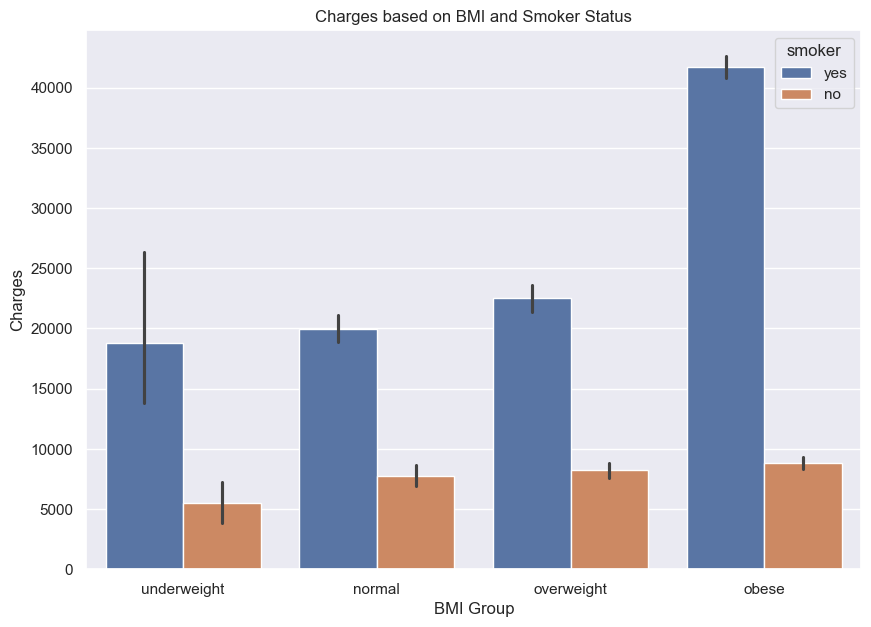

In [94]:
plt.figure(figsize=(10, 7))
sns.barplot(x='bmi_category', y='charges', hue='smoker', data=health_insurance)
plt.title('Charges based on BMI and Smoker Status')
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.show()

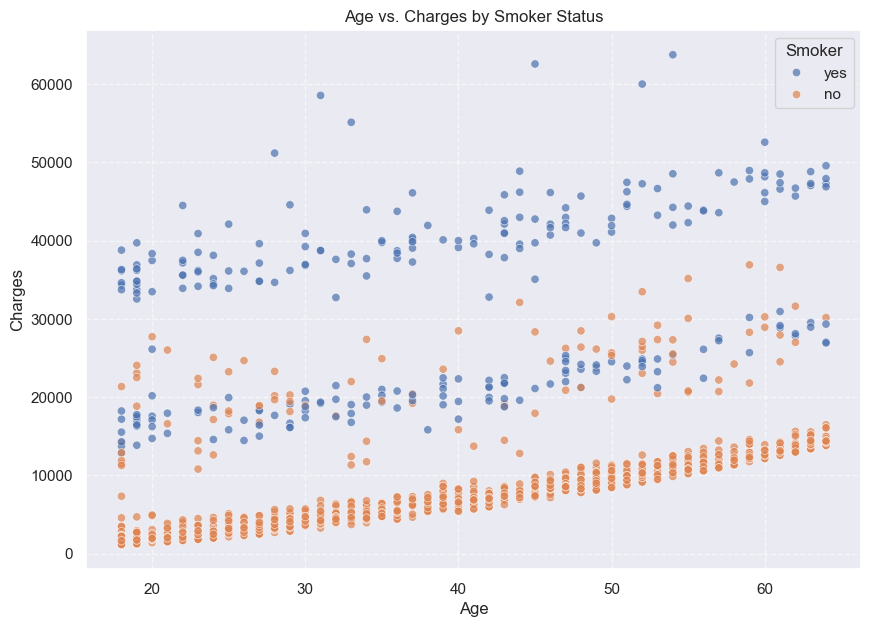

In [95]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='charges', hue='smoker', data=health_insurance, alpha=0.7)
plt.title('Age vs. Charges by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

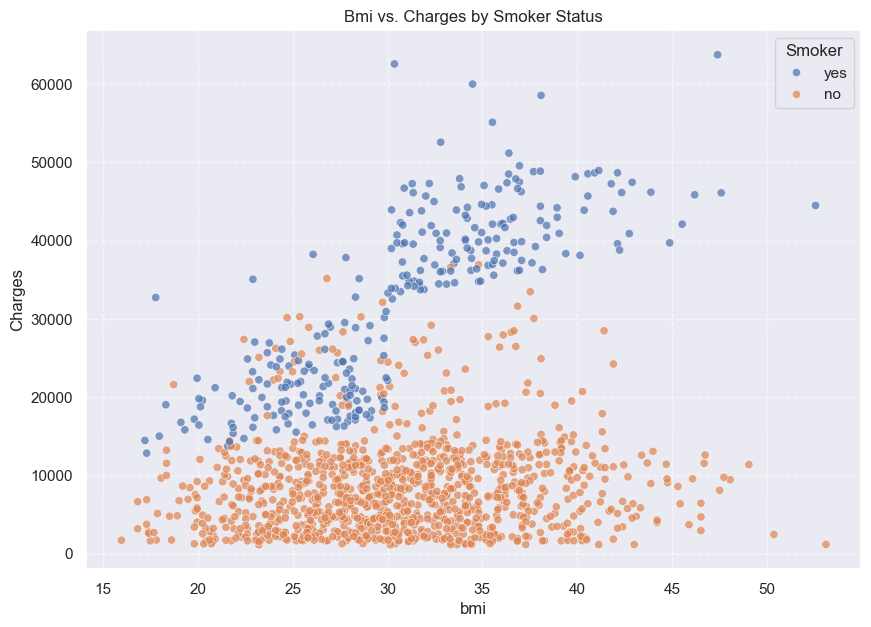

In [96]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=health_insurance, alpha=0.7)
plt.title('Bmi vs. Charges by Smoker Status')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

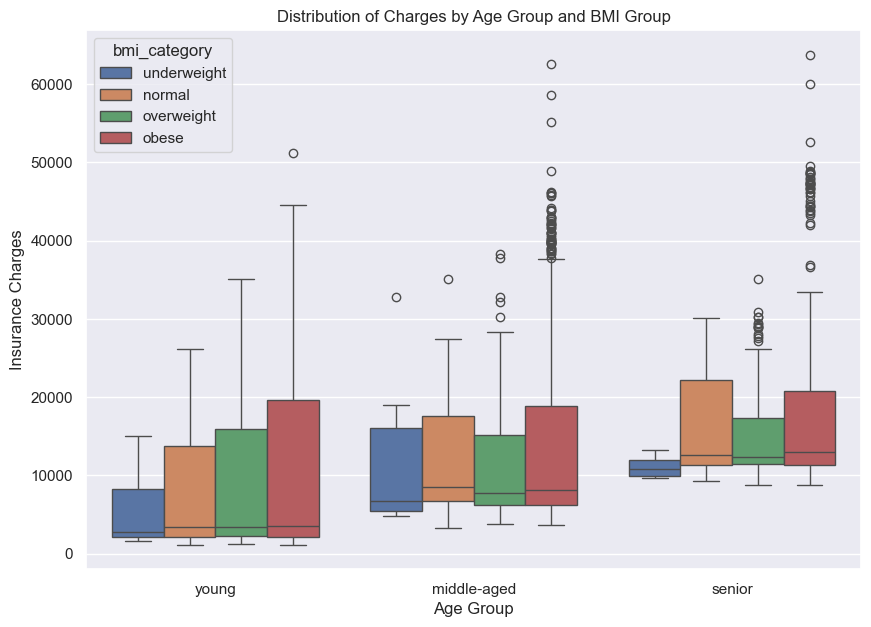

In [97]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='age_group', y='charges', hue='bmi_category', data=health_insurance)
plt.title('Distribution of Charges by Age Group and BMI Group')
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.show()

## Data PreProcessing

#### Converting Categorical data

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
health_insurance['sex'] = health_insurance['sex'].map({'male': 0, 'female': 1}) 
health_insurance['smoker'] = health_insurance['smoker'].map({'no': 0, 'yes': 1})

In [100]:
label_encoder=LabelEncoder()
health_insurance['region'] = label_encoder.fit_transform(health_insurance['region'])

In [101]:
region_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(region_mapping)

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [102]:
label_encoder=LabelEncoder()
health_insurance['bmi_category'] = label_encoder.fit_transform(health_insurance['bmi_category'])
bmi_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(bmi_mapping)

{'normal': 0, 'obese': 1, 'overweight': 2, 'underweight': 3}


In [103]:
label_encoder=LabelEncoder()
health_insurance['age_group'] = label_encoder.fit_transform(health_insurance['age_group'])
age_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(age_mapping)

{'middle-aged': 0, 'senior': 1, 'young': 2}


In [104]:
health_insurance

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group
0,19,1,27.900,0,1,3,16884.92400,2,2
1,18,0,33.770,1,0,2,1725.55230,1,2
2,28,0,33.000,3,0,2,4449.46200,1,2
3,33,0,22.705,0,0,1,21984.47061,0,0
4,32,0,28.880,0,0,1,3866.85520,2,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830,1,0
1334,18,1,31.920,0,0,0,2205.98080,1,2
1335,18,1,36.850,0,0,2,1629.83350,1,2
1336,21,1,25.800,0,0,3,2007.94500,2,2


### Checking for the highly correlated features

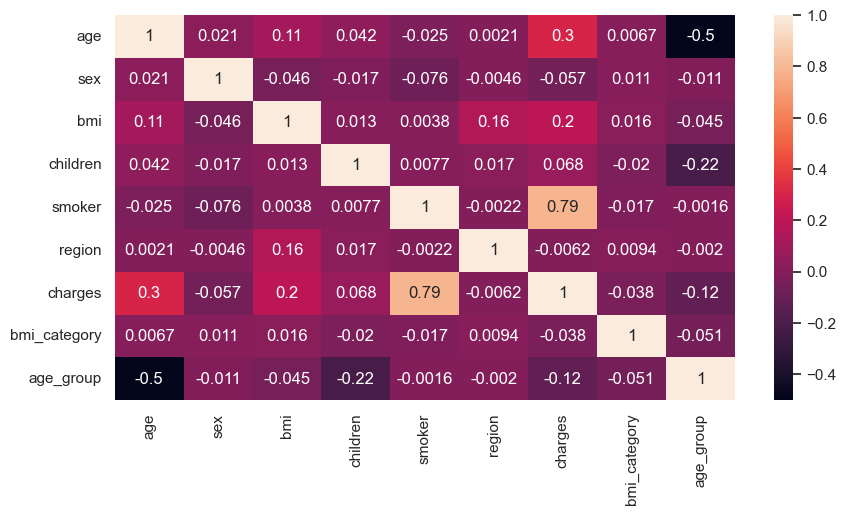

In [105]:
plt.figure(figsize=(10, 5))
sns.heatmap(health_insurance.corr(), annot=True)
plt.show()

#### Smoker and Age are the highest correlated features

## Splitting the Data

In [106]:
X = health_insurance.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region,bmi_category,age_group
0,19,1,27.900,0,1,3,2,2
1,18,0,33.770,1,0,2,1,2
2,28,0,33.000,3,0,2,1,2
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,2,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,1,0
1334,18,1,31.920,0,0,0,1,2
1335,18,1,36.850,0,0,2,1,2
1336,21,1,25.800,0,0,3,2,2


In [107]:
y = health_insurance.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Scaling the data

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.43876426,  1.0105187 , -0.45332   , ...,  1.34390459,
         1.20385734,  1.25350032],
       [-1.50996545, -0.98959079,  0.5096211 , ...,  0.43849455,
        -0.21406618,  1.25350032],
       [-0.79795355, -0.98959079,  0.38330685, ...,  0.43849455,
        -0.21406618,  1.25350032],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ...,  0.43849455,
        -0.21406618,  1.25350032],
       [-1.29636188,  1.0105187 , -0.79781341, ...,  1.34390459,
         1.20385734,  1.25350032],
       [ 1.55168573,  1.0105187 , -0.26138796, ..., -0.46691549,
         1.20385734,  0.08228284]])

In [109]:
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
y_scaled

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

## Model 1 : Linear Regression Model using the Entire Dataset

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2,random_state=0)

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [113]:
reg.coef_

array([[ 0.32057479,  0.00102654,  0.16699625,  0.0533699 ,  0.78582733,
        -0.02626878, -0.01866805,  0.05296444]])

In [114]:
reg.intercept_

array([-0.00316692])

In [115]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'bmi_category',
       'age_group'],
      dtype='object')

In [116]:
y_pred = reg.predict(X_test)

## Model Evaluation

In [117]:
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
r2_score(y_test, y_pred)

0.8059524749062463

In [119]:
mean_squared_error(y_test, y_pred)

0.21071511133393464

In [120]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4590371568118801

## Model Performance Visualization

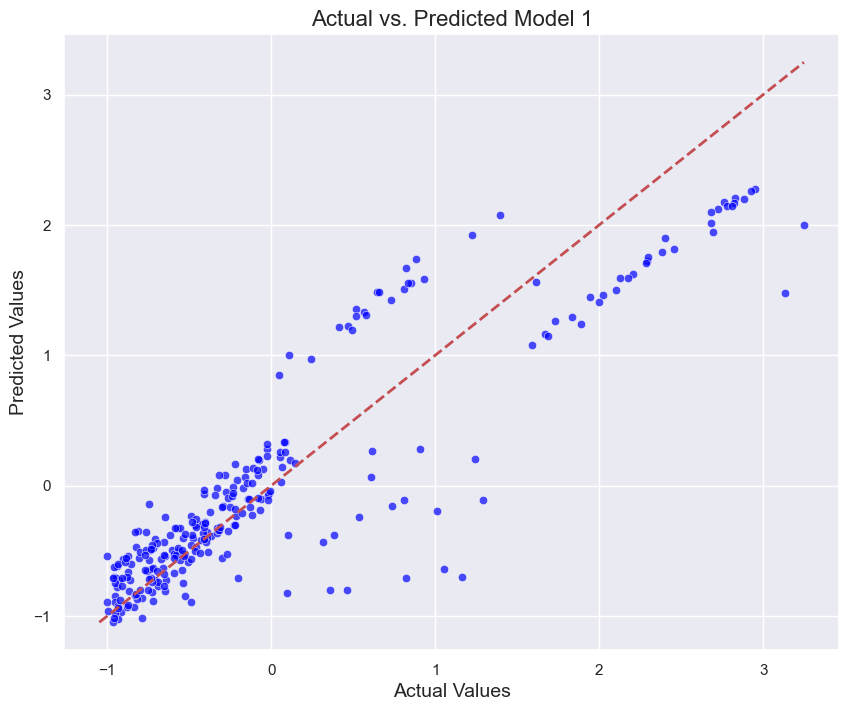

In [121]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.7, color='blue')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs. Predicted Model 1', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.show()

#### Linear regression model ran on the entire dataset gave a bit low of the score
#### I'll run it again using the highest correlated features

## Model 2 : Linear Regression Model using the Highest Correlated Features

In [122]:
selected = health_insurance[['smoker','age','bmi','charges']]

In [123]:
X_selected = selected.drop(['charges'],axis=1)

In [124]:
y_selected = selected.charges

In [125]:
X_scaledS =scaler.fit_transform(X_selected)
X_scaledS

array([[ 1.97058663, -1.43876426, -0.45332   ],
       [-0.5074631 , -1.50996545,  0.5096211 ],
       [-0.5074631 , -0.79795355,  0.38330685],
       ...,
       [-0.5074631 , -1.50996545,  1.0148781 ],
       [-0.5074631 , -1.29636188, -0.79781341],
       [ 1.97058663,  1.55168573, -0.26138796]])

In [126]:
y_scaledS = scaler.fit_transform(y_selected.values.reshape(-1,1))
y_scaledS

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [127]:
from sklearn.model_selection import train_test_split
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_scaledS, y_scaledS, test_size = 0.2, random_state =0)

In [128]:
reg_selected = LinearRegression()
reg_selected.fit(X_trainS, y_trainS)

LinearRegression()

In [129]:
reg_selected.coef_

array([[0.78756048, 0.298217  , 0.16206759]])

In [130]:
reg_selected.intercept_

array([-0.00477229])

In [131]:
y_predS = reg_selected.predict(X_testS)

## Model Evaluation

In [132]:
r2_score(y_testS, y_predS)

0.7945500805653087

In [133]:
mean_squared_error(y_testS, y_predS)

0.22309690693716777

In [134]:
np.sqrt(mean_squared_error(y_testS, y_predS))

0.472331352905106

## Model Performance Visualization

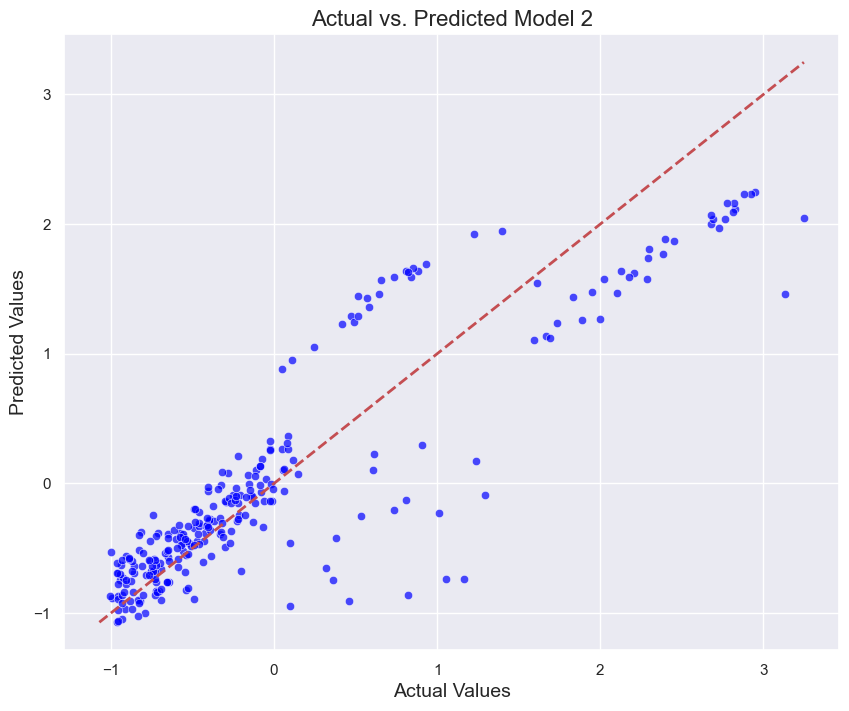

In [135]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_testS.flatten(), y=y_predS.flatten(), alpha=0.7, color='blue')
min_val = min(y_testS.min(), y_predS.min())
max_val = max(y_testS.max(), y_predS.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs. Predicted Model 2', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.show()

#### Selecting the highly correlated features didn't make that much of a difference in the performance of the model overall

## Model 3 : Random Forest Regressor

In [136]:
from sklearn.model_selection import train_test_split
X_trainF, X_testF, y_trainF, y_testF = train_test_split(X, y, test_size = 0.2,random_state=0)

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
regressor = RandomForestRegressor(n_estimators=221,max_depth=None,max_features='log2',min_samples_split=6,min_samples_leaf=2,random_state=0)
regressor.fit(X_trainF, y_trainF)

RandomForestRegressor(max_features='log2', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=221, random_state=0)

## Model Evaluation

In [139]:
regressor.score(X_testF, y_testF)

0.9016046690024432

In [140]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X_trainF, y_trainF, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.4f} (±{scores.std():.4f})")   

Cross-validated R²: 0.8390 (±0.0260)


In [141]:
y_predF = regressor.predict(X_testF)

In [142]:
train_score = regressor.score(X_trainF, y_trainF)
test_score = regressor.score(X_testF, y_testF)

print(f"Training R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")

Training R²: 0.9209
Test R²: 0.9016


## Model Performance Visualization

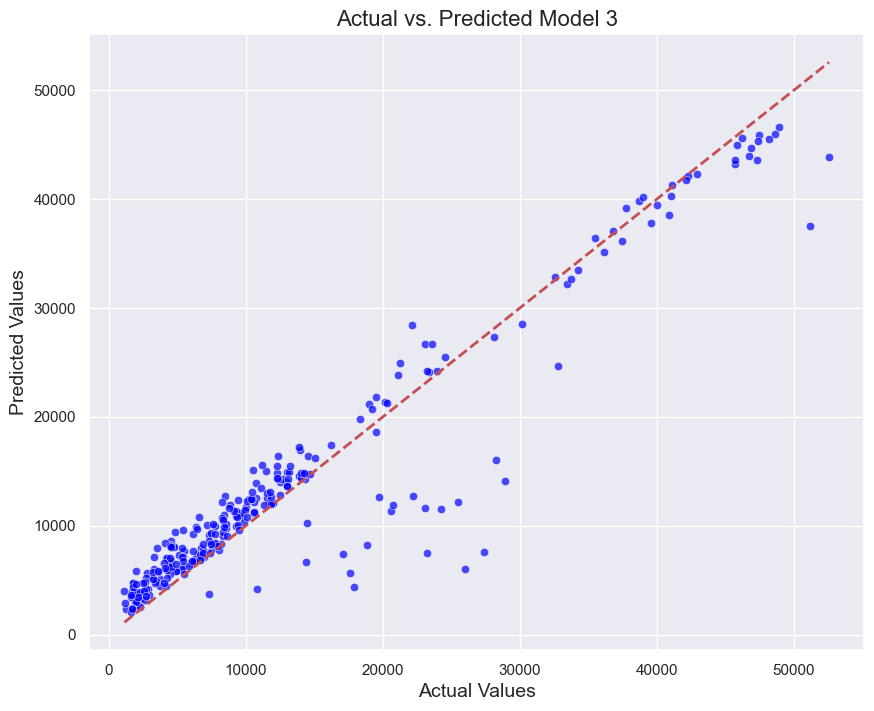

In [143]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_testF, y=y_predF, alpha=0.7, color='blue')
min_val = min(y_testF.min(), y_predF.min())
max_val = max(y_testF.max(), y_predF.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs. Predicted Model 3', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.show()

#### Red-dotted line is the actual values and the blue dots are the predicted ones

#### Its apparent that the random forest deals better with the outliers compared to the linear regression model

# Comparing the Models

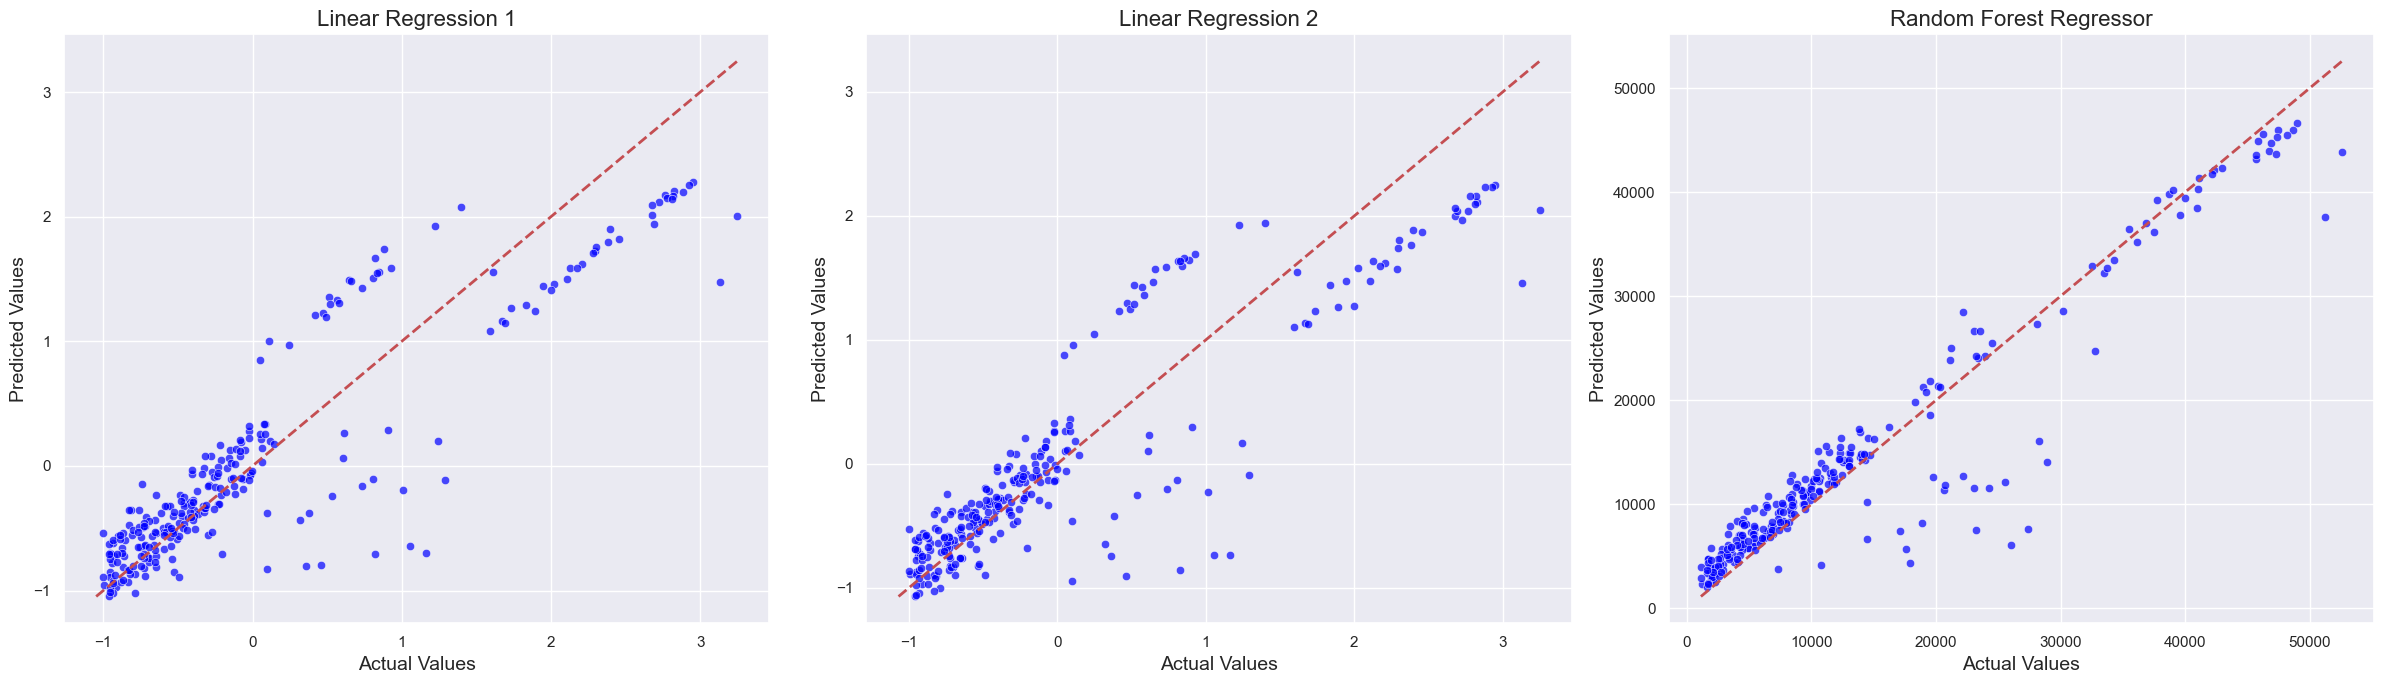

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(24, 7)) 

sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.7, color='blue', ax=axes[0])
min_val_1 = min(y_test.min(), y_pred.min())
max_val_1 = max(y_test.max(), y_pred.max())
axes[0].plot([min_val_1, max_val_1], [min_val_1, max_val_1], 'r--', lw=2)
axes[0].set_title('Linear Regression 1', fontsize=16)
axes[0].set_xlabel('Actual Values', fontsize=14)
axes[0].set_ylabel('Predicted Values', fontsize=14)

sns.scatterplot(x=y_testS.flatten(), y=y_predS.flatten(), alpha=0.7, color='blue', ax=axes[1])
min_val_S = min(y_testS.min(), y_predS.min())
max_val_S = max(y_testS.max(), y_predS.max())
axes[1].plot([min_val_S, max_val_S], [min_val_S, max_val_S], 'r--', lw=2)
axes[1].set_title('Linear Regression 2', fontsize=16)
axes[1].set_xlabel('Actual Values', fontsize=14)
axes[1].set_ylabel('Predicted Values', fontsize=14)

sns.scatterplot(x=y_testF, y=y_predF, alpha=0.7, color='blue', ax=axes[2])
min_val_F = min(y_testF.min(), y_predF.min())
max_val_F = max(y_testF.max(), y_predF.max())
axes[2].plot([min_val_F, max_val_F], [min_val_F, max_val_F], 'r--', lw=2)
axes[2].set_title('Random Forest Regressor', fontsize=16)
axes[2].set_xlabel('Actual Values', fontsize=14)
axes[2].set_ylabel('Predicted Values', fontsize=14)

plt.tight_layout()
plt.show()

### The Random Forest Regressor achieved the best performance.

# Deployment

In [145]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [146]:
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_testF, file)
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_testF, file)

# Thank You!